In [3]:
from MoneyModel import *
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [4]:
model = MoneyModel(50, 10, 10)
for i in range(100):
    model.step()

<AxesSubplot: >

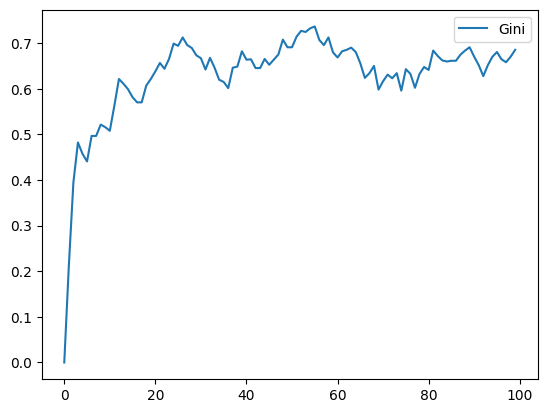

In [5]:
gini = model.datacollector.get_model_vars_dataframe()
gini.plot()

In [6]:
agent_wealth = model.datacollector.get_agent_vars_dataframe()
agent_wealth.head()

Wealth
Step AgentID        
0    0             1
     1             1
     2             1
     3             1
     4             1

<AxesSubplot: >

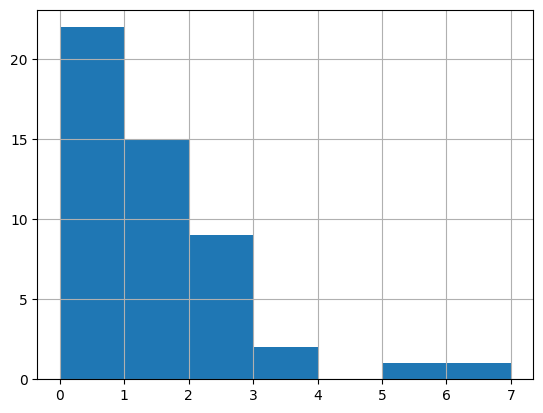

In [8]:
end_wealth = agent_wealth.xs(99, level="Step")["Wealth"]
end_wealth.hist(bins=range(agent_wealth.Wealth.max() + 1))

In [9]:
params = {"width": 10, "height": 10, "N": range(10, 500, 10)}

results = mesa.batch_run(
    MoneyModel,
    parameters=params,
    iterations=5,
    max_steps=100,
    number_processes=1,
    data_collection_period=1,
    display_progress=True,
)

100%|██████████| 245/245 [00:57<00:00,  4.29it/s]


In [10]:
import pandas as pd

results_df = pd.DataFrame(results)
print(results_df.keys())

Index(['RunId', 'iteration', 'Step', 'width', 'height', 'N', 'Gini', 'AgentID',
       'Wealth'],
      dtype='object')


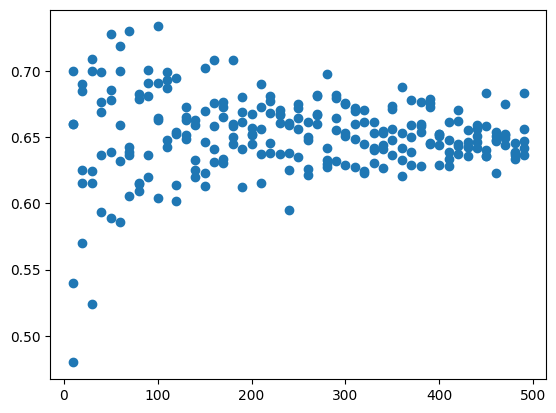

In [11]:
results_filtered = results_df[(results_df.AgentID == 0) & (results_df.Step == 100)]
N_values = results_filtered.N.values
gini_values = results_filtered.Gini.values
plt.scatter(N_values, gini_values)

In [12]:
# First, we filter the results
one_episode_wealth = results_df[(results_df.N == 10) & (results_df.iteration == 2)]
# Then, print the columns of interest of the filtered data frame
print(
    one_episode_wealth.to_string(
        index=False, columns=["Step", "AgentID", "Wealth"], max_rows=25
    )
)

 Step  AgentID  Wealth
    0        0       1
    0        1       1
    0        2       1
    0        3       1
    0        4       1
    0        5       1
    0        6       1
    0        7       1
    0        8       1
    0        9       1
    1        0       1
    1        1       1
  ...      ...     ...
   99        8       0
   99        9       2
  100        0       1
  100        1       0
  100        2       2
  100        3       0
  100        4       0
  100        5       2
  100        6       2
  100        7       1
  100        8       0
  100        9       2


In [13]:
results_one_episode = results_df[
    (results_df.N == 10) & (results_df.iteration == 1) & (results_df.AgentID == 0)
]
print(results_one_episode.to_string(index=False, columns=["Step", "Gini"], max_rows=25))

 Step  Gini
    0  0.00
    1  0.00
    2  0.00
    3  0.00
    4  0.00
    5  0.00
    6  0.18
    7  0.18
    8  0.18
    9  0.18
   10  0.32
   11  0.32
  ...   ...
   89  0.46
   90  0.54
   91  0.54
   92  0.54
   93  0.54
   94  0.62
   95  0.62
   96  0.62
   97  0.54
   98  0.54
   99  0.54
  100  0.54
